In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from pycaret.classification import *
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score,f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import RobustScaler
from scipy.stats import norm, skew
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)

In [3]:
pd.set_option('display.max_columns', 37)
train.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,HeavyAtomMolWt,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,222.068080,1.181818,1.727273,2.363636,-0.24,212.163,8.170000,11.922504,0.171585,4,0.000000,91.536492,0.000000,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357,0,0,1,1,0,0,0,0
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,260.029719,1.346154,2.076923,2.769231,-0.09,247.031,3.201491,10.932338,-4.830450,10,24.415866,7.822697,0.000000,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310,0,0,0,1,1,0,0,0
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,382.131027,1.085714,1.742857,2.400000,-0.78,354.106,15.033890,11.238048,-5.066255,9,0.000000,15.645394,0.000000,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120,0,0,1,1,0,0,1,0
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,530.070277,1.162791,1.573770,2.270270,-1.30,506.124,6.724301,11.171170,-5.276575,19,42.727765,21.335138,0.000000,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997,0,0,1,1,0,0,0,0
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,118.062994,1.444444,2.111111,2.555556,-1.10,108.056,3.931272,9.855741,-1.676296,4,6.041841,11.938611,6.923737,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333,2,2,1,0,1,1,1,0


In [4]:
train.describe()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,HeavyAtomMolWt,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,515.153604,9.135189,5.854307,6.738497,4.432570,5.253221,3.418749,1.773472,29.202823,10.435316,292.623087,1.236774,1.812070,2.255470,-1.207776,274.950211,5.874372,10.556443,-2.119772,8.584108,11.021644,17.790011,8.962440,11.318811,6.704487,15.666766,31.066423,13.636941,49.309959,0.458215,0.459226,0.667745,0.798962,0.313789,0.279081,0.144831,0.151570
std,542.456370,6.819989,4.647064,5.866444,3.760516,4.925065,3.436208,1.865898,31.728679,13.651843,225.384140,5.491284,5.495565,5.501200,0.935314,212.678755,45.730226,1.559331,2.066415,7.643769,13.958962,34.561655,19.756727,20.169745,10.865415,18.080208,33.896638,14.598554,29.174824,0.667948,0.668111,0.471038,0.400790,0.464047,0.448562,0.351942,0.358616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007276,-666.000000,-666.000000,-666.000000,-7.730000,0.000000,-104.040000,0.000000,-6.327514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.430556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,149.103601,4.680739,2.844556,2.932842,1.949719,2.034468,1.160763,0.503897,5.969305,0.000000,148.037173,1.045455,1.690909,2.100000,-1.660000,136.109000,1.784008,9.926190,-4.659604,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.969305,6.420822,4.794537,30.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,290.987941,6.485270,4.052701,4.392859,2.970427,3.242775,1.948613,1.073261,17.353601,6.420822,206.042653,1.250000,1.865152,2.358491,-1.100000,194.276500,3.261011,10.421334,-1.265370,6.000000,6.041841,5.969305,0.000000,0.000000,0.000000,11.752550,20.075376,9.589074,41.666667,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,652.652585,11.170477,7.486791,8.527859,5.788793,6.609350,4.502070,2.534281,44.876559,12.841643,343.090331,1.500000,2.062153,2.500000,-0.570000,326.002000,5.848400,11.539743,-0.787037,10.000000,18.311899,15.645394,12.132734,13.847474,6.923737,17.721856,42.727765,14.912664,56.090650,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,4069.959780,69.551167,50.174588,53.431954,32.195368,34.579313,22.880836,16.072810,363.705954,99.936429,2237.318490,3.000000,3.200000,3.400000,0.820000,2035.133000,1512.242231,15.630251,6.000000,42.000000,97.663462,482.434223,375.425148,211.501279,100.348416,80.742293,492.729739,115.406157,384.450519,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14838 entries, 0 to 14837
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BertzCT            14838 non-null  float64
 1   Chi1               14838 non-null  float64
 2   Chi1n              14838 non-null  float64
 3   Chi1v              14838 non-null  float64
 4   Chi2n              14838 non-null  float64
 5   Chi2v              14838 non-null  float64
 6   Chi3v              14838 non-null  float64
 7   Chi4n              14838 non-null  float64
 8   EState_VSA1        14838 non-null  float64
 9   EState_VSA2        14838 non-null  float64
 10  ExactMolWt         14838 non-null  float64
 11  FpDensityMorgan1   14838 non-null  float64
 12  FpDensityMorgan2   14838 non-null  float64
 13  FpDensityMorgan3   14838 non-null  float64
 14  HallKierAlpha      14838 non-null  float64
 15  HeavyAtomMolWt     14838 non-null  float64
 16  Kappa3             148

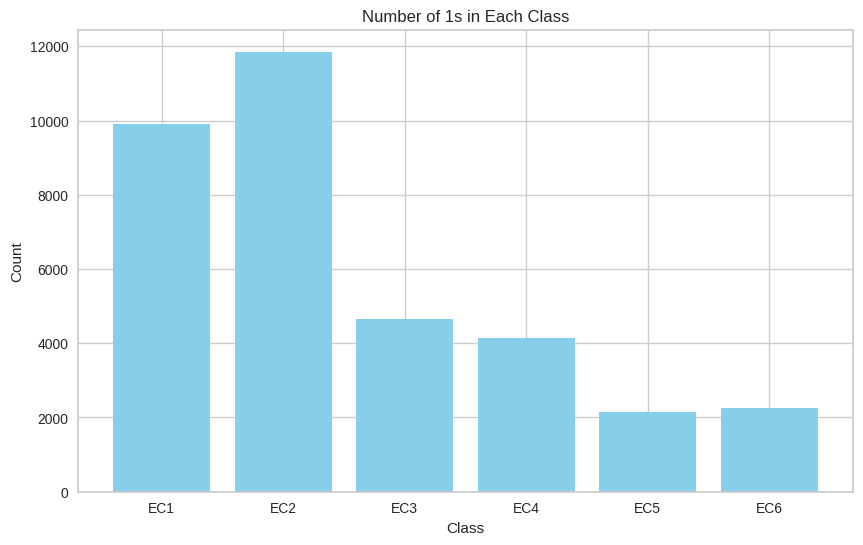

In [6]:
labels = ['EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6']

# Count the number of 1s in each class
counts = [train[label].sum() for label in labels]

# Create the bar plot
plt.figure(figsize=(10,6))
plt.bar(labels, counts, color='skyblue')
plt.title('Number of 1s in Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

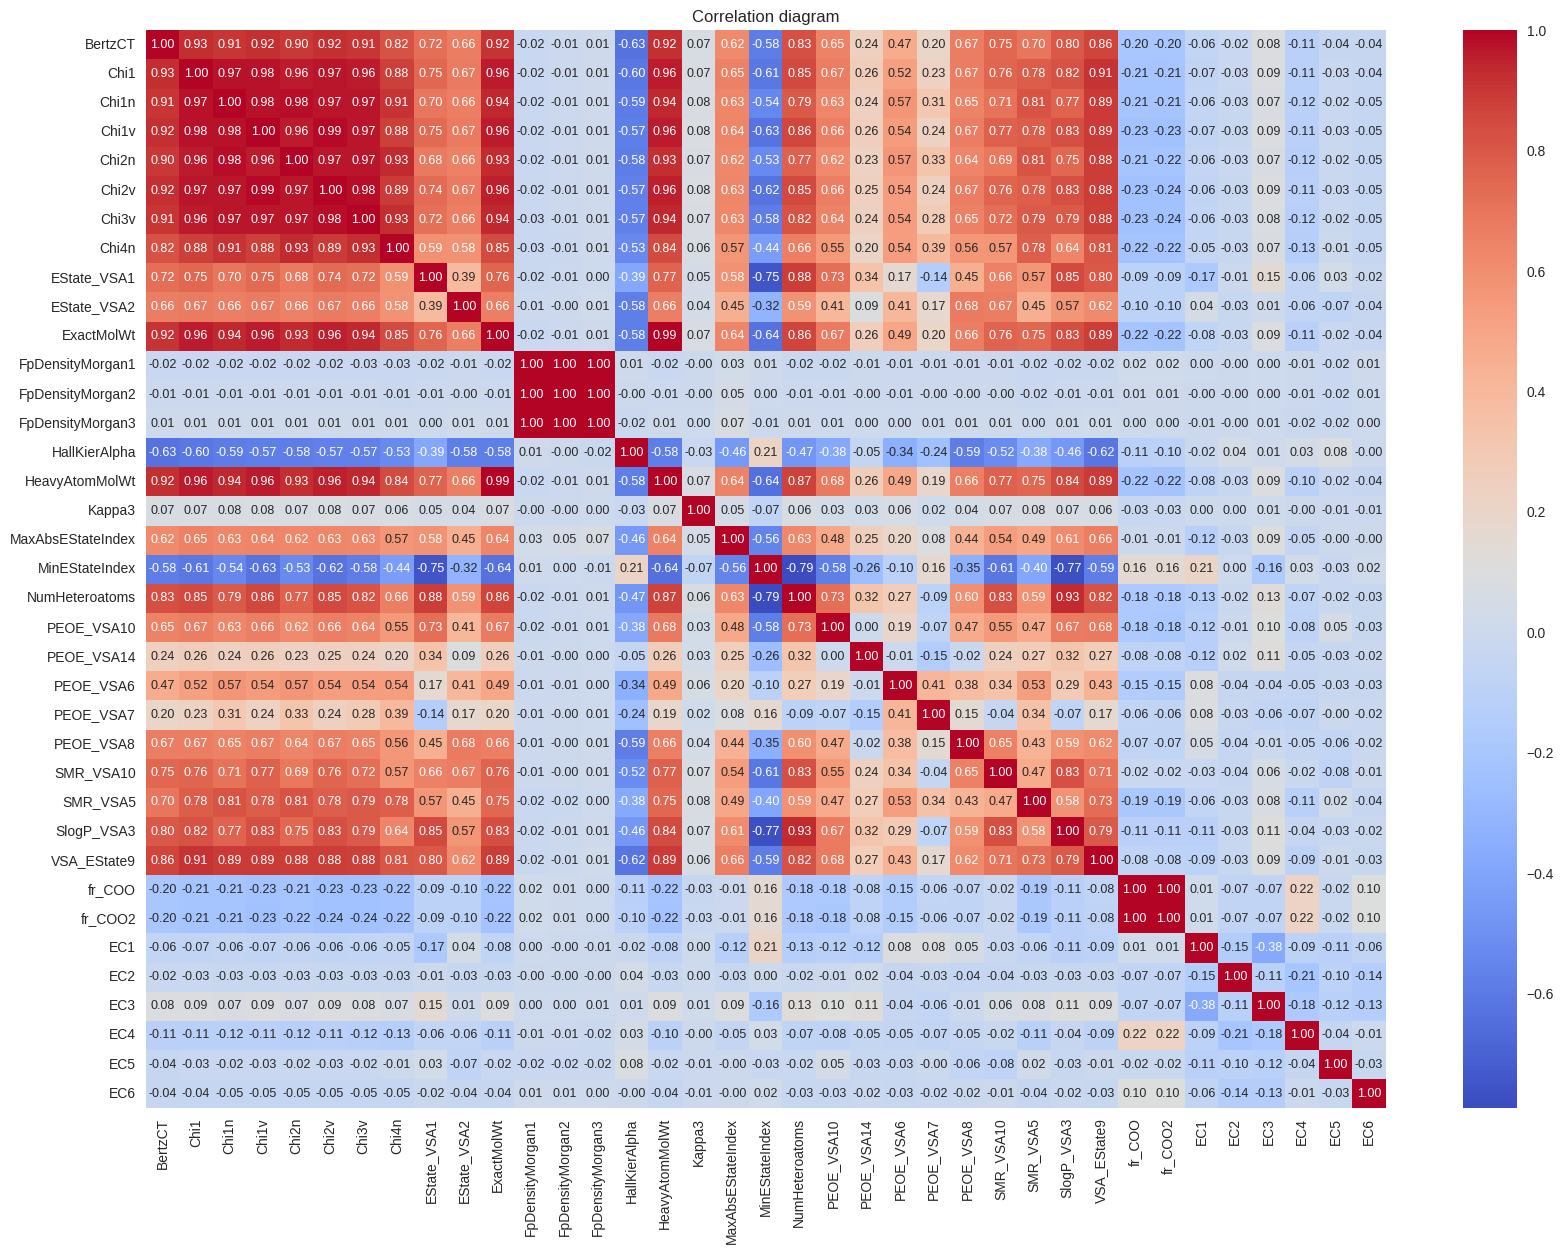

In [12]:
correlation_matrix = train.corr()

# ヒートマップを描画
plt.figure(figsize=(20, 14))  # グラフのサイズを設定
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 9}, fmt=".2f", cmap='coolwarm')  # ヒートマップを描画
plt.title('Correlation diagram')  # グラフのタイトルを設定
plt.show()  # グラフを表示

In [7]:
# 重要度確認　EC1
# Define the feature columns and the target column
feature_columns = train.columns.drop(['EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'])
target_column = 'EC1'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train[feature_columns], train[target_column], test_size=0.2, random_state=42)

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Get the feature importances
feature_importances = clf.feature_importances_

# Create a dataframe of the feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importances})

# Sort the dataframe by importance
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Display the feature importances
feature_importances_df

,Feature,Importance
18,MinEStateIndex,0.051075
8,EState_VSA1,0.042657
17,MaxAbsEStateIndex,0.042593
19,NumHeteroatoms,0.041212
28,VSA_EState9,0.040731
16,Kappa3,0.040700
0,BertzCT,0.040658
5,Chi2v,0.039224
10,ExactMolWt,0.039059
6,Chi3v,0.037620


In [14]:
# 重要度確認　EC1
# Define the feature columns and the target column
feature_columns = train.columns.drop(['EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'])
target_column = 'EC2'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train[feature_columns], train[target_column], test_size=0.2, random_state=42)

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Get the feature importances
feature_importances = clf.feature_importances_

# Create a dataframe of the feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importances})

# Sort the dataframe by importance
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Display the feature importances
feature_importances_df

,Feature,Importance
18,MinEStateIndex,0.045471
28,VSA_EState9,0.044894
16,Kappa3,0.044165
0,BertzCT,0.044080
17,MaxAbsEStateIndex,0.043645
6,Chi3v,0.041683
13,FpDensityMorgan3,0.041479
7,Chi4n,0.041198
3,Chi1v,0.040674
4,Chi2n,0.040491


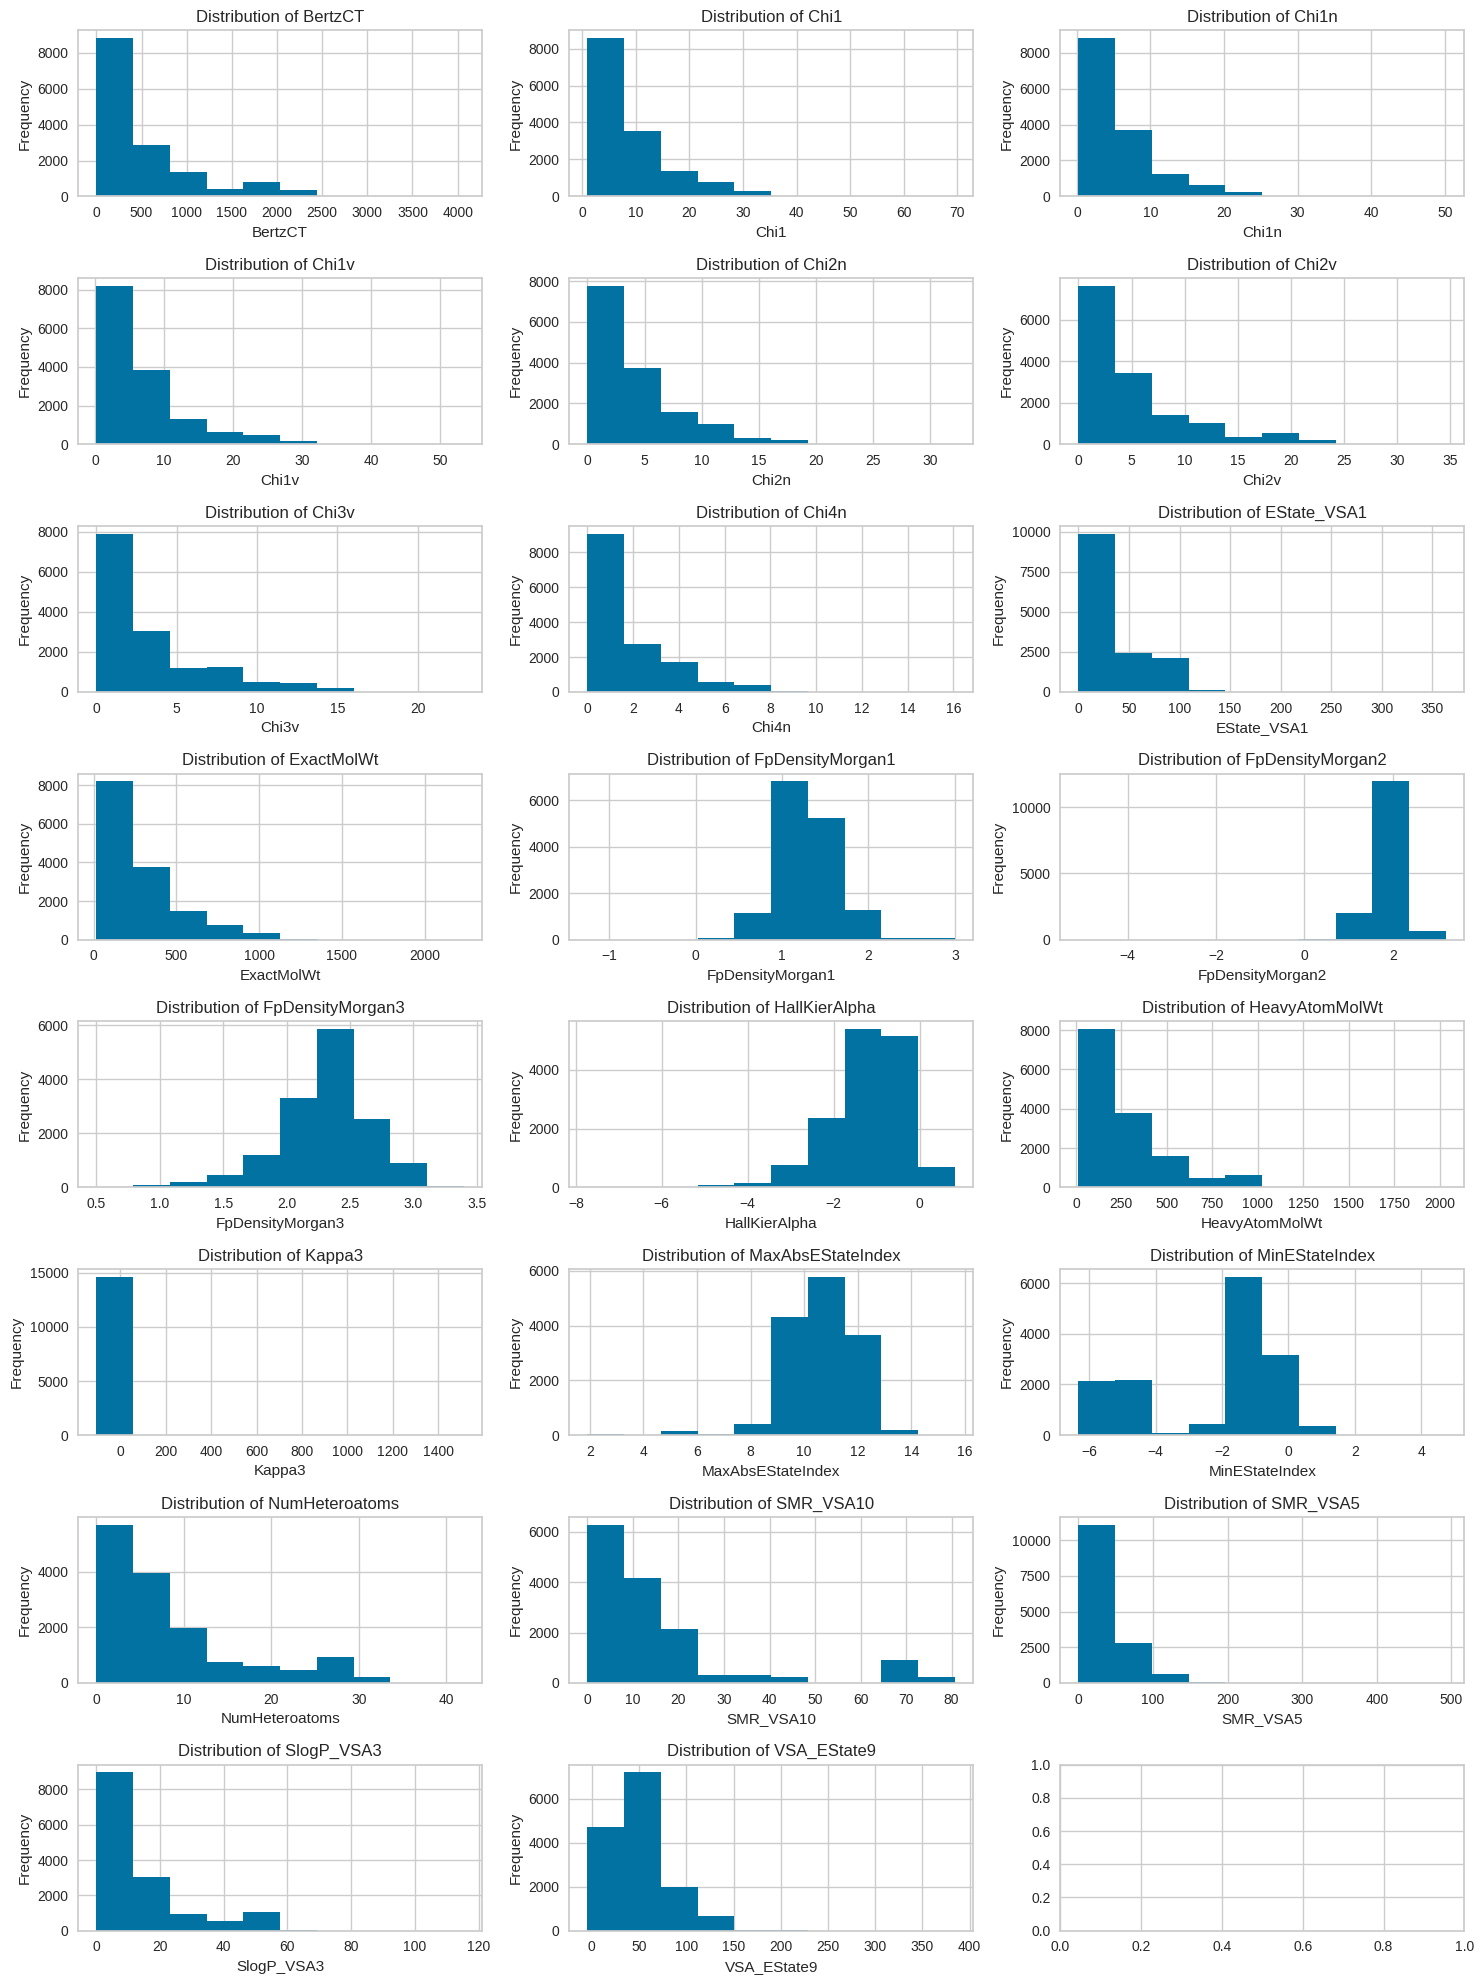

In [38]:
num_cols = 3  # 1行あたりの列数
num_rows = (len(train.columns) + num_cols - 1) // num_cols  # 必要な行数

# サブプロットの作成
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))  # figsizeで図のサイズを設定

# カラムごとにヒストグラムを描画
for i, column in enumerate(train.columns):
    ax = axes[i // num_cols, i % num_cols]  # サブプロットを取得
    train[column].hist(ax=ax)  # ヒストグラムを描画
    ax.set_xlabel(column)  # x軸のラベルを設定
    ax.set_ylabel('Frequency')  # y軸のラベルを設定
    ax.set_title(f'Distribution of {column}')  # グラフのタイトルを設定

plt.tight_layout()  # レイアウトの調整
plt.show()  # グラフを表示

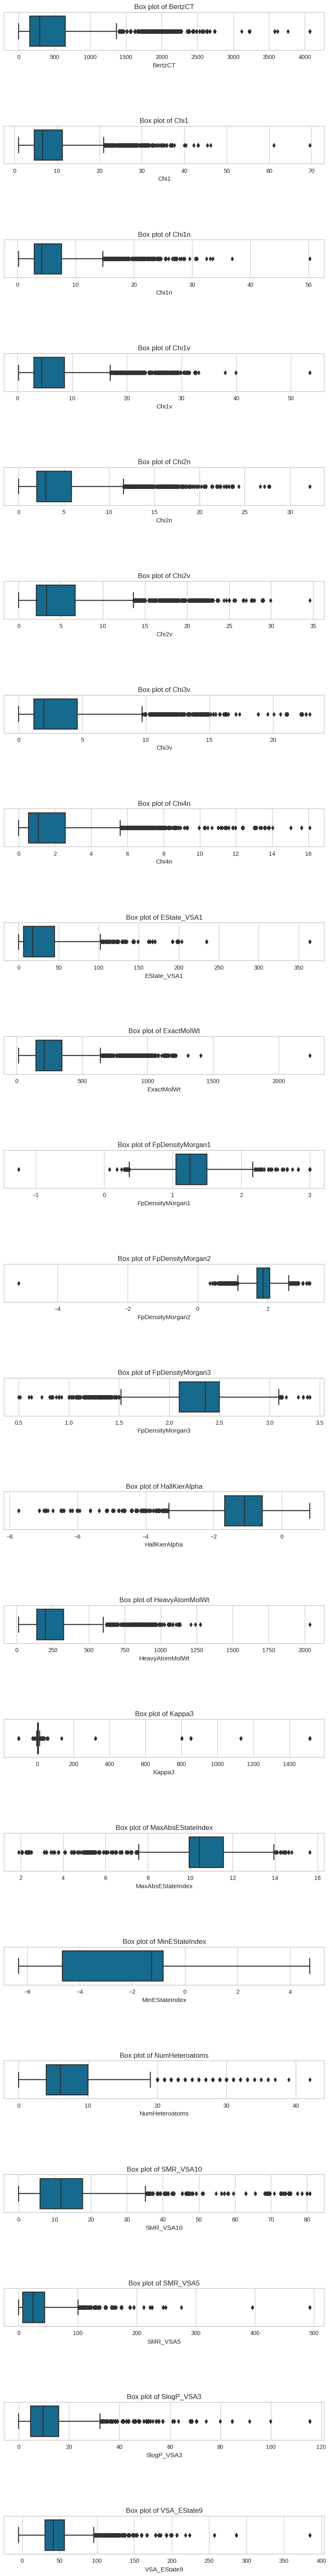

In [26]:
n = len(train.columns)
ncols = 1  # Number of columns in your plot
nrows = n // ncols  # Number of rows in your plot
nrows += n % ncols  # Add a row if there are any remaining plots

# Create a figure and axes
fig, axs = plt.subplots(nrows, ncols, figsize=(10, 80))

# Flatten the 2-D array to 1-D
axs = axs.ravel()

# Create box plots for each feature
for i, feature in enumerate(train.columns):
    sns.boxplot(x=train[feature], ax=axs[i])
    axs[i].set_title(f'Box plot of {feature}')

# Remove any unused subplots
if n < nrows * ncols:
    for i in range(n, nrows * ncols):
        fig.delaxes(axs[i])
        
plt.subplots_adjust(hspace=2)

# Display the plot
plt.show()

In [8]:
train = train.drop(['EC2', 'EC3', 'EC4', 'EC5', 'EC6', 'fr_COO', 'fr_COO2'], axis=1)

In [50]:
X = train.drop(['EC1'], axis=1)
y = train[['EC1']]

In [51]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
params_EC1 ={'depth': 2,
 'l2_leaf_reg': 7,
 'border_count': 254,
 'verbose': False,
 'random_strength': 0.3,
 'task_type': 'CPU',
 'n_estimators': 210,
 'random_state': 5537,
 'eta': 0.05}

In [54]:
model_EC1 = CatBoostClassifier(**params_EC1)
model_EC1.fit(X_train, y_train['EC1'])

In [57]:
val_predictions_EC1 = model_EC1.predict(X_val)
cm_EC1 = confusion_matrix(y_val['EC1'], val_predictions_EC1)
print('Confusion matrix for EC1:')
print(cm_EC1)
f1_EC1 = f1_score(y_val['EC1'], val_predictions_EC1)
print('F1 score for EC1:', f1_EC1)
roc_auc_EC1 = roc_auc_score(y_val['EC1'], val_predictions_EC1)
print('ROC AUC for EC1:', roc_auc_EC1)

Confusion matrix for EC1:
[[ 377  610]
 [ 292 1646]]
F1 score for EC1: 0.7849308536003814
ROC AUC for EC1: 0.6156473787723376


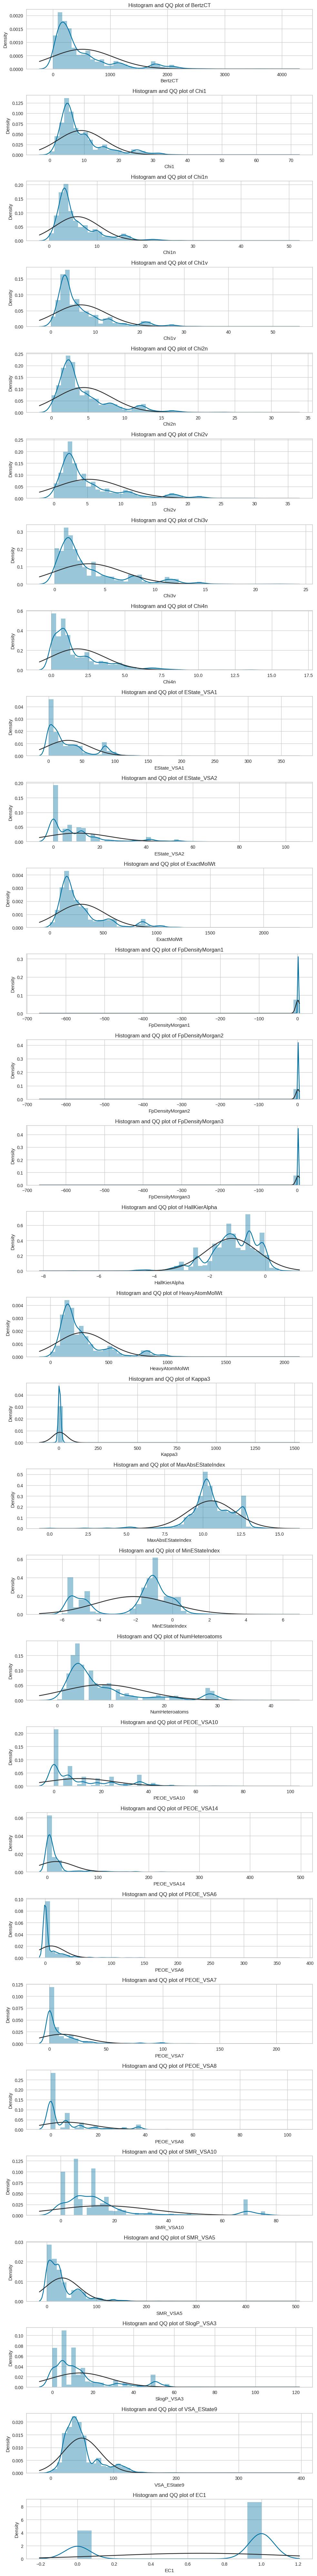

In [12]:
fig, axs = plt.subplots(len(train.columns), figsize=(10, 80))

# Create histograms and QQ plots for each feature
for i, feature in enumerate(train.columns):
    sns.distplot(train[feature], fit=norm, ax=axs[i])
    axs[i].set_title(f'Histogram and QQ plot of {feature}')

# Display the plot
plt.tight_layout()
plt.show()

In [162]:
y_val_pred_ec1 = model.predict_proba(X_val)[:, 1]
y_val_pred_ec1

array([0.79584857, 0.25547177, 0.93322284, ..., 0.79001398, 0.21463798,
       0.97371449])

In [163]:
# チューニングするハイパーパラメータの候補を定義
param_grid = {
    'depth': [4, 6],
    'learning_rate': [0.1, 0.2],
    'l2_leaf_reg': [10, 20],
    'iterations': [100, 200]
}

# CatBoostClassifierオブジェクトを作成
model = CatBoostClassifier(random_state=1315)

# GridSearchCVを使用してハイパーパラメータチューニングを実行
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train_ec1)

0:	learn: 0.6541027	total: 52.8ms	remaining: 5.22s
1:	learn: 0.6238647	total: 57.5ms	remaining: 2.82s
2:	learn: 0.6012805	total: 63.4ms	remaining: 2.05s
3:	learn: 0.5806543	total: 74.8ms	remaining: 1.79s
4:	learn: 0.5608260	total: 84.5ms	remaining: 1.6s
5:	learn: 0.5494901	total: 90.2ms	remaining: 1.41s
6:	learn: 0.5392476	total: 97.6ms	remaining: 1.3s
7:	learn: 0.5308357	total: 102ms	remaining: 1.17s
8:	learn: 0.5240384	total: 107ms	remaining: 1.08s
9:	learn: 0.5195084	total: 112ms	remaining: 1.01s
10:	learn: 0.5152319	total: 116ms	remaining: 939ms
11:	learn: 0.5108491	total: 121ms	remaining: 887ms
12:	learn: 0.5045254	total: 126ms	remaining: 842ms
13:	learn: 0.5006635	total: 130ms	remaining: 796ms
14:	learn: 0.4812765	total: 136ms	remaining: 769ms
15:	learn: 0.4793119	total: 140ms	remaining: 734ms
16:	learn: 0.4776720	total: 145ms	remaining: 706ms
17:	learn: 0.4764855	total: 150ms	remaining: 681ms
18:	learn: 0.4755486	total: 157ms	remaining: 670ms
19:	learn: 0.4742136	total: 167ms	re

KeyboardInterrupt: 

In [105]:
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'depth': 6, 'iterations': 100, 'l2_leaf_reg': 10, 'learning_rate': 0.1}


In [107]:
# 最適なハイパーパラメータで再トレーニング
best_model = CatBoostClassifier(**grid_search.best_params_, random_state=1315)
best_model.fit(X_train, y_train_ec1)

# バリデーションデータで予測
y_val_pred_ec1 = best_model.predict_proba(X_val)

0:	learn: 0.6448034	total: 68.5ms	remaining: 6.78s
1:	learn: 0.5805192	total: 111ms	remaining: 5.46s
2:	learn: 0.5619949	total: 133ms	remaining: 4.29s
3:	learn: 0.5473856	total: 154ms	remaining: 3.7s
4:	learn: 0.5367710	total: 170ms	remaining: 3.23s
5:	learn: 0.5226270	total: 184ms	remaining: 2.88s
6:	learn: 0.4966424	total: 201ms	remaining: 2.67s
7:	learn: 0.4889448	total: 231ms	remaining: 2.65s
8:	learn: 0.4848421	total: 240ms	remaining: 2.43s
9:	learn: 0.4804893	total: 264ms	remaining: 2.38s
10:	learn: 0.4773955	total: 275ms	remaining: 2.22s
11:	learn: 0.4732740	total: 288ms	remaining: 2.11s
12:	learn: 0.4712766	total: 302ms	remaining: 2.02s
13:	learn: 0.4693436	total: 328ms	remaining: 2.02s
14:	learn: 0.4587298	total: 337ms	remaining: 1.91s
15:	learn: 0.4573500	total: 348ms	remaining: 1.83s
16:	learn: 0.4560418	total: 377ms	remaining: 1.84s
17:	learn: 0.4547582	total: 396ms	remaining: 1.8s
18:	learn: 0.4536258	total: 410ms	remaining: 1.75s
19:	learn: 0.4468873	total: 433ms	remainin

In [109]:
y_val_pred_ec1[:, 1]

array([0.80631674, 0.23047097, 0.96894801, ..., 0.79361228, 0.27133265,
       0.9784258 ])

In [111]:
auc = roc_auc_score(y_val_ec1, y_val_pred_ec1[:, 1])
print(f"Validation AUC: {auc}")

Validation AUC: 0.8424203988083482


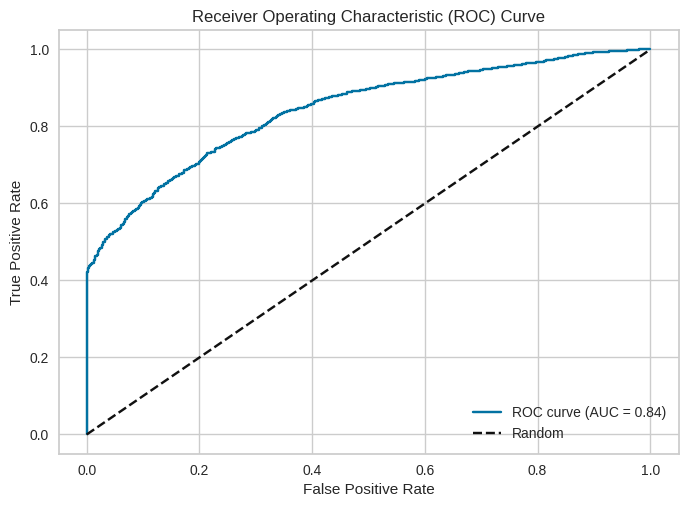

In [113]:
fpr, tpr, thresholds = roc_curve(y_val_ec1, y_val_pred_ec1[:, 1])
auc = roc_auc_score(y_val_ec1, y_val_pred_ec1[:, 1])

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# # チューニングするハイパーパラメータの範囲を定義
# param_dist = {
#     'depth': sp_randint(6, 11),
#     'learning_rate': [0.01, 0.05, 0.1],
#     'l2_leaf_reg': sp_randint(10, 31),
#     'iterations': sp_randint(100, 201)
# }

# # CatBoostClassifierオブジェクトを作成
# model = CatBoostClassifier(random_state=1315)

# # RandomizedSearchCVを使用してランダムサーチを実行
# random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, random_state=42)
# random_search.fit(X_train, y_train_ec1)

0:	learn: 0.6228789	total: 476ms	remaining: 1m 30s
1:	learn: 0.5942880	total: 577ms	remaining: 54.8s
2:	learn: 0.5720879	total: 667ms	remaining: 42s
3:	learn: 0.5491529	total: 730ms	remaining: 34.3s
4:	learn: 0.5228669	total: 809ms	remaining: 30.3s
5:	learn: 0.5081933	total: 872ms	remaining: 27s
6:	learn: 0.4908254	total: 955ms	remaining: 25.2s
7:	learn: 0.4834887	total: 1.02s	remaining: 23.5s
8:	learn: 0.4783018	total: 1.08s	remaining: 22s
9:	learn: 0.4722323	total: 1.15s	remaining: 20.9s
10:	learn: 0.4602226	total: 1.21s	remaining: 19.9s
11:	learn: 0.4570891	total: 1.29s	remaining: 19.4s
12:	learn: 0.4533567	total: 1.35s	remaining: 18.7s
13:	learn: 0.4495844	total: 1.44s	remaining: 18.3s
14:	learn: 0.4474631	total: 1.5s	remaining: 17.8s
15:	learn: 0.4444255	total: 1.59s	remaining: 17.5s
16:	learn: 0.4418865	total: 1.64s	remaining: 16.9s
17:	learn: 0.4392895	total: 1.7s	remaining: 16.4s
18:	learn: 0.4370264	total: 1.75s	remaining: 16s
19:	learn: 0.4346998	total: 1.85s	remaining: 15.9s

In [42]:
# # 最適なハイパーパラメータを表示
# print("Best Parameters: ", random_search.best_params_)

Best Parameters:  {'depth': 6, 'iterations': 190, 'l2_leaf_reg': 19, 'learning_rate': 0.1}


In [43]:
# # 最適なハイパーパラメータで再トレーニング
# best_model = CatBoostClassifier(**random_search.best_params_, random_state=1315)
# best_model.fit(X_train, y_train_ec1)

# # バリデーションデータで予測
# y_val_pred = best_model.predict(X_val)
# accuracy = accuracy_score(y_val_ec1, y_val_pred)

0:	learn: 0.6450403	total: 64ms	remaining: 12.1s
1:	learn: 0.5828264	total: 76.9ms	remaining: 7.23s
2:	learn: 0.5641135	total: 84.8ms	remaining: 5.29s
3:	learn: 0.5493370	total: 95.8ms	remaining: 4.45s
4:	learn: 0.5385637	total: 111ms	remaining: 4.09s
5:	learn: 0.5242145	total: 121ms	remaining: 3.72s
6:	learn: 0.4986376	total: 134ms	remaining: 3.51s
7:	learn: 0.4810109	total: 144ms	remaining: 3.27s
8:	learn: 0.4772600	total: 152ms	remaining: 3.05s
9:	learn: 0.4733821	total: 160ms	remaining: 2.88s
10:	learn: 0.4712126	total: 169ms	remaining: 2.74s
11:	learn: 0.4676954	total: 176ms	remaining: 2.6s
12:	learn: 0.4654993	total: 186ms	remaining: 2.54s
13:	learn: 0.4636597	total: 202ms	remaining: 2.54s
14:	learn: 0.4614949	total: 214ms	remaining: 2.49s
15:	learn: 0.4601302	total: 222ms	remaining: 2.41s
16:	learn: 0.4586805	total: 230ms	remaining: 2.34s
17:	learn: 0.4573720	total: 240ms	remaining: 2.3s
18:	learn: 0.4561746	total: 248ms	remaining: 2.23s
19:	learn: 0.4491204	total: 260ms	remaini

In [44]:
# print("Validation Accuracy: ", accuracy)

Validation Accuracy:  0.7712264150943396
